# G20 Countries: GDP, Happiness, Peace, and Democracy

## Introduction
The relationship between a country’s wealth and the well-being of its citizens has long been a topic of interest among researchers and policymakers. While it is often assumed that countries with higher levels of wealth enjoy greater levels of peace, happiness, and democracy, the reality is more complex. In this study, we aim to explore this relationship by examining data from the Global Peace Index, Happiness Index, and Democracy Index for G20 countries in 2022.

## Objective
The objective of this study is to investigate the relationship between a country’s wealth and its levels of peace, happiness, and democracy. Specifically, we aim to:

1. Analyze data from the Global Peace Index, Happiness Index, and Democracy Index for G20 countries in 2022.
2. Examine the correlation between a country’s wealth and its scores on these indices.
3. Explore potential explanations for any observed relationships.

## Data Source
### 1. Gross Domestic Product over the world
    The data is available on https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
### 2. Global Peace Index
    The data is downloadable on https://www.visionofhumanity.org/
### 3. World Happiness Score
    The data is downloadable on https://worldhappiness.report/ed/2022/
### 4. Democracy Index
    The data is downloadable on https://www.eiu.com/n/campaigns/democracy-index-2022/

### Import library we need

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Happiness Score
First we upload happiness data and do cleaning on the cleaning and exploratory data analysis

Export or read file for happiness score

In [2]:
path="C:/Users/ADM/Downloads/project/archive/2022.csv"

In [3]:
df=pd.read_csv(path)

In [4]:
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


we will get the columns we need, namely, country and Happiness score

In [5]:
happiness_df=df[['Country','Happiness score']]
happiness_df

,Country,Happiness score
0,Finland,"7,821"
1,Denmark,"7,636"
2,Iceland,"7,557"
3,Switzerland,"7,512"
4,Netherlands,"7,415"
...,...,...
142,Rwanda*,"3,268"
143,Zimbabwe,"2,995"
144,Lebanon,"2,955"
145,Afghanistan,"2,404"


In [6]:
happiness_df.dropna(inplace=True)

C:\Users\ADM\AppData\Local\Temp\ipykernel_22920\3907103610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happiness_df.dropna(inplace=True)


In [7]:
happiness_df=happiness_df.rename(columns={'Country':'country','Happiness score':'happiness_score'})
happiness_df

,country,happiness_score
0,Finland,"7,821"
1,Denmark,"7,636"
2,Iceland,"7,557"
3,Switzerland,"7,512"
4,Netherlands,"7,415"
...,...,...
141,Botswana*,"3,471"
142,Rwanda*,"3,268"
143,Zimbabwe,"2,995"
144,Lebanon,"2,955"


In [8]:
happiness_df.describe()

,country,happiness_score
count,146,146
unique,146,141
top,Finland,"4,516"
freq,1,2


Before we convert to float, we have to change',' to '.'. ',' symbol can read as object.

In [9]:
happiness_df['happiness_score']=happiness_df['happiness_score'].str.replace(',','.')
happiness_df

,country,happiness_score
0,Finland,7.821
1,Denmark,7.636
2,Iceland,7.557
3,Switzerland,7.512
4,Netherlands,7.415
...,...,...
141,Botswana*,3.471
142,Rwanda*,3.268
143,Zimbabwe,2.995
144,Lebanon,2.955


Convert happiness type from object to float64

In [10]:
happiness_df['happiness_score']=pd.to_numeric(happiness_df['happiness_score']).astype('float64')

In [11]:
happiness_df.head(20)

,country,happiness_score
0,Finland,7.821
1,Denmark,7.636
2,Iceland,7.557
3,Switzerland,7.512
4,Netherlands,7.415
5,Luxembourg*,7.404
6,Sweden,7.384
7,Norway,7.365
8,Israel,7.364
9,New Zealand,7.200


## Global Peace Index

export file csv as if GPI index

In [20]:
path2="C:/Users/ADM/Downloads/project/gpindex.csv"

In [21]:
header=['rank','country','peace_score']

In [22]:
peace_df=pd.read_csv(path2,names=header)
peace_df.head()

,rank,country,peace_score
0,0,Iceland,1.107
1,1,New Zealand,1.269
2,2,Ireland,1.288
3,3,Denmark,1.296
4,4,Austria,1.300


In [23]:
peace_df.shape

(163, 3)

In [24]:
peace_df.dtypes

rank             int64
country         object
peace_score    float64
dtype: object

we cut the rank column off

In [25]:
peace_df=peace_df.drop(columns='rank')

In [26]:
peace_df.head(20)

,country,peace_score
0,Iceland,1.107
1,New Zealand,1.269
2,Ireland,1.288
3,Denmark,1.296
4,Austria,1.300
5,Portugal,1.301
6,Slovenia,1.316
7,Czech Republic,1.318
8,Singapore,1.326
9,Japan,1.336


In [27]:
peace_df

,country,peace_score
0,Iceland,1.107
1,New Zealand,1.269
2,Ireland,1.288
3,Denmark,1.296
4,Austria,1.300
...,...,...
158,South Sudan,3.184
159,Russia,3.275
160,Syria,3.356
161,Yemen,3.394


### Gross Domestic Bruto

In [28]:
path3="C:/Users/ADM/Downloads/project/P_Data_Extract_From_World_Development_Indicators/5aea7a34-44d7-4887-a36e-a8e7db44021b_Data.csv"

In [29]:
dfra=pd.read_csv(path3)

In [30]:
dfra.head(15)

,Series Name,Series Code,Country Name,Country Code,Time,Time Code,Value
0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,1990.0,YR1990,NaN
1,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,2000.0,YR2000,NaN
2,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,2013.0,YR2013,2.056449e+10
3,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,2014.0,YR2014,2.055058e+10
4,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,2015.0,YR2015,1.999814e+10
5,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,2016.0,YR2016,1.801955e+10
6,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,2017.0,YR2017,1.889635e+10
7,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,2018.0,YR2018,1.841886e+10
8,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,2019.0,YR2019,1.890450e+10
9,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,2020.0,YR2020,2.014345e+10


In [31]:
dfra.shape

(3197, 7)

we choose data in 2022 so we cut the rest data off

In [32]:
dfra_new=dfra[dfra['Time']==2022]
dfra_new

,Series Name,Series Code,Country Name,Country Code,Time,Time Code,Value
11,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,2022.0,YR2022,NaN
23,GDP (current US$),NY.GDP.MKTP.CD,Albania,ALB,2022.0,YR2022,1.888210e+10
35,GDP (current US$),NY.GDP.MKTP.CD,Algeria,DZA,2022.0,YR2022,1.919129e+11
47,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,ASM,2022.0,YR2022,NaN
59,GDP (current US$),NY.GDP.MKTP.CD,Andorra,AND,2022.0,YR2022,3.352033e+09
...,...,...,...,...,...,...,...
3143,GDP (current US$),NY.GDP.MKTP.CD,Sub-Saharan Africa,SSF,2022.0,YR2022,2.047347e+12
3155,GDP (current US$),NY.GDP.MKTP.CD,Sub-Saharan Africa (excluding high income),SSA,2022.0,YR2022,2.045759e+12
3167,GDP (current US$),NY.GDP.MKTP.CD,Sub-Saharan Africa (IDA & IBRD countries),TSS,2022.0,YR2022,2.047347e+12
3179,GDP (current US$),NY.GDP.MKTP.CD,Upper middle income,UMC,2022.0,YR2022,3.005534e+13


In [33]:
gdp=dfra_new[['Country Name','Value']].reset_index(drop=True)
gdp

,Country Name,Value
0,Afghanistan,NaN
1,Albania,1.888210e+10
2,Algeria,1.919129e+11
3,American Samoa,NaN
4,Andorra,3.352033e+09
...,...,...
261,Sub-Saharan Africa,2.047347e+12
262,Sub-Saharan Africa (excluding high income),2.045759e+12
263,Sub-Saharan Africa (IDA & IBRD countries),2.047347e+12
264,Upper middle income,3.005534e+13


In [34]:
gdp=gdp.rename(columns={'Country Name': 'country','Value':'gdp'})
gdp

,country,gdp
0,Afghanistan,NaN
1,Albania,1.888210e+10
2,Algeria,1.919129e+11
3,American Samoa,NaN
4,Andorra,3.352033e+09
...,...,...
261,Sub-Saharan Africa,2.047347e+12
262,Sub-Saharan Africa (excluding high income),2.045759e+12
263,Sub-Saharan Africa (IDA & IBRD countries),2.047347e+12
264,Upper middle income,3.005534e+13


We have to remove some atributes, since they are regions not coutries

In [35]:
gdp.tail(49)

,country,gdp
217,Africa Eastern and Southern,1.169484e+12
218,Africa Western and Central,8.778633e+11
219,Arab World,3.557557e+12
220,Caribbean small states,9.293565e+10
221,Central Europe and the Baltics,1.946331e+12
222,Early-demographic dividend,1.402951e+13
223,East Asia & Pacific,3.065525e+13
224,East Asia & Pacific (excluding high income),2.118932e+13
225,East Asia & Pacific (IDA & IBRD countries),2.116288e+13
226,Euro area,1.404089e+13


In [36]:
# get the index of the bottom rows 
bottom_fifty=gdp.tail(49).index

# Drop the bottom 49 rows by their index
gdp=gdp.drop(bottom_fifty)

In [37]:
gdp.tail()

,country,gdp
212,Virgin Islands (U.S.),NaN
213,West Bank and Gaza,1.911190e+10
214,"Yemen, Rep.",NaN
215,Zambia,2.978445e+10
216,Zimbabwe,2.067806e+10


It looks like there are so many NaN values, so we will look into them

In [38]:
gdp.isna().value_counts().to_frame()

0
country gdp       
False   False  185
        True    32

In [39]:
# we count how many NaN values are
gdp['gdp'].isna().count()

217

In [40]:
# we show them
gdp[gdp['gdp'].isna()]

,country,gdp
0,Afghanistan,NaN
3,American Samoa,NaN
9,Aruba,NaN
22,Bhutan,NaN
27,British Virgin Islands,NaN
36,Cayman Islands,NaN
39,Channel Islands,NaN
49,Cuba,NaN
50,Curacao,NaN
61,Eritrea,NaN


Since our objectives is G-20 countries, We will remove the NaN values

In [41]:
gdp=gdp.dropna()
gdp.shape

(185, 2)

In [42]:
gdp.dtypes

country     object
gdp        float64
dtype: object

In [43]:
gdp.sort_values(by='gdp', ascending=False).head(20).reset_index()

,index,country,gdp
0,206,United States,2.546270e+13
1,41,China,1.796317e+13
2,98,Japan,4.231141e+12
3,73,Germany,4.072192e+12
4,89,India,3.385090e+12
5,205,United Kingdom,3.070668e+12
6,68,France,2.782905e+12
7,161,Russian Federation,2.240422e+12
8,35,Canada,2.139840e+12
9,96,Italy,2.010432e+12


In [44]:
# Sort gdp data by gdp
gdp=gdp.sort_values(by='gdp', ascending=False).reset_index(drop=True)

# Keep only top 20
gdp=gdp.head(20)

We change some contry names lest we got error. The name of the country is not the same.

In [45]:
gdp=gdp.replace(to_replace=['United States','Russian Federation','Korea, Rep.','Turkiye'],value=['United States of America','Russia','South Korea','Turkey'])

In [49]:
# we have table gdp which contains the name of G20 countries and their GDP in 2022
gdp

,country,gdp
0,United States of America,2.546270e+13
1,China,1.796317e+13
2,Japan,4.231141e+12
3,Germany,4.072192e+12
4,India,3.385090e+12
5,United Kingdom,3.070668e+12
6,France,2.782905e+12
7,Russia,2.240422e+12
8,Canada,2.139840e+12
9,Italy,2.010432e+12


In [50]:
merge1=gdp.merge(peace_df,how='left')

In [51]:
merge1

,country,gdp,peace_score
0,United States of America,2.546270e+13,2.440
1,China,1.796317e+13,2.010
2,Japan,4.231141e+12,1.336
3,Germany,4.072192e+12,1.462
4,India,3.385090e+12,2.578
5,United Kingdom,3.070668e+12,1.667
6,France,2.782905e+12,1.895
7,Russia,2.240422e+12,3.275
8,Canada,2.139840e+12,1.389
9,Italy,2.010432e+12,1.643


we get some NaN values because they have different names

In [52]:
merge1[merge1['peace_score'].isna()]

,country,gdp,peace_score


In [53]:
happiness_df=happiness_df.replace(to_replace='United States',value='United States of America')

In [54]:
merge2=merge1.merge(happiness_df,how='left')
merge2

,country,gdp,peace_score,happiness_score
0,United States of America,2.546270e+13,2.440,6.977
1,China,1.796317e+13,2.010,5.585
2,Japan,4.231141e+12,1.336,6.039
3,Germany,4.072192e+12,1.462,7.034
4,India,3.385090e+12,2.578,3.777
5,United Kingdom,3.070668e+12,1.667,6.943
6,France,2.782905e+12,1.895,6.687
7,Russia,2.240422e+12,3.275,5.459
8,Canada,2.139840e+12,1.389,7.025
9,Italy,2.010432e+12,1.643,6.467


In [55]:
df_new=merge2

In [56]:
df_new

,country,gdp,peace_score,happiness_score
0,United States of America,2.546270e+13,2.440,6.977
1,China,1.796317e+13,2.010,5.585
2,Japan,4.231141e+12,1.336,6.039
3,Germany,4.072192e+12,1.462,7.034
4,India,3.385090e+12,2.578,3.777
5,United Kingdom,3.070668e+12,1.667,6.943
6,France,2.782905e+12,1.895,6.687
7,Russia,2.240422e+12,3.275,5.459
8,Canada,2.139840e+12,1.389,7.025
9,Italy,2.010432e+12,1.643,6.467


In [ ]:
def human_format(num, round_to=1):
    magnitude = 0
    abbr=''
    while abs(num) >= 1000:
        magnitude += 1
        num = round(num / 1000.0, round_to)
        abbr = ['', 'K', 'M', 'B', 'T', 'Q'][magnitude]
    return f'{num:.{round_to}f}{abbr}'
df_new['gdp']=df_new['gdp'].apply(human_format)

## Democracy index

In [57]:
path4="C:/Users/ADM/Downloads/project/democration_index.csv"

In [58]:
header=['country','democracy score','Rank','Change in rank from previous year','Electoral process and pluralism','Functioning of Goverment','Political Participation','Political Culture','Civil Liberties']

In [59]:
df=pd.read_csv(path4,names=header)

In [60]:
df.head()

,country,democracy score,Rank,Change in rank from previous year,Electoral process and pluralism,Functioning of Goverment,Political Participation,Political Culture,Civil Liberties
0,Norway,9.81,1,0,10.00,9.64,10.00,10.00,9.41
1,New Zealand,9.61,2,0,10.00,9.29,10.00,8.75,10.00
2,Iceland,9.52,3,2,10.00,9.64,8.89,9.38,9.71
3,Sweden,9.39,4,0,9.58,9.64,8.33,10.00,9.41
4,Finland,9.29,5,-2,10.00,9.64,8.33,8.75,9.71


In [61]:
democracy=df[['country','democracy score']]

In [62]:
democracy.head()

,country,democracy score
0,Norway,9.81
1,New Zealand,9.61
2,Iceland,9.52
3,Sweden,9.39
4,Finland,9.29


In [63]:
merge3=merge2.merge(democracy,how='left')
merge3

,country,gdp,peace_score,happiness_score,democracy score
0,United States of America,2.546270e+13,2.440,6.977,7.85
1,China,1.796317e+13,2.010,5.585,1.94
2,Japan,4.231141e+12,1.336,6.039,8.33
3,Germany,4.072192e+12,1.462,7.034,8.80
4,India,3.385090e+12,2.578,3.777,7.04
5,United Kingdom,3.070668e+12,1.667,6.943,8.28
6,France,2.782905e+12,1.895,6.687,8.07
7,Russia,2.240422e+12,3.275,5.459,2.28
8,Canada,2.139840e+12,1.389,7.025,8.88
9,Italy,2.010432e+12,1.643,6.467,7.69


In [64]:
g20_country=merge3

In [65]:
g20_country

,country,gdp,peace_score,happiness_score,democracy score
0,United States of America,2.546270e+13,2.440,6.977,7.85
1,China,1.796317e+13,2.010,5.585,1.94
2,Japan,4.231141e+12,1.336,6.039,8.33
3,Germany,4.072192e+12,1.462,7.034,8.80
4,India,3.385090e+12,2.578,3.777,7.04
5,United Kingdom,3.070668e+12,1.667,6.943,8.28
6,France,2.782905e+12,1.895,6.687,8.07
7,Russia,2.240422e+12,3.275,5.459,2.28
8,Canada,2.139840e+12,1.389,7.025,8.88
9,Italy,2.010432e+12,1.643,6.467,7.69


In [66]:
g20_country=g20_country.sort_values(by='gdp', ascending=True)

In [67]:
g20_country.describe()

,gdp,peace_score,happiness_score,democracy score
count,2.000000e+01,20.000000,20.000000,20.000000
mean,4.028154e+12,1.973550,6.271050,6.864000
std,6.248812e+12,0.555356,0.945703,2.386059
min,8.077060e+11,1.336000,3.777000,1.940000
25%,1.377907e+12,1.554250,5.847500,6.345000
50%,1.965264e+12,1.789500,6.471500,7.940000
75%,3.149273e+12,2.446250,6.989000,8.425000
max,2.546270e+13,3.275000,7.512000,9.140000


Now we have complete table which contains G20 coutry name, its GDP, peace score, happiness score, democracy score.
we are going to call the table as g20

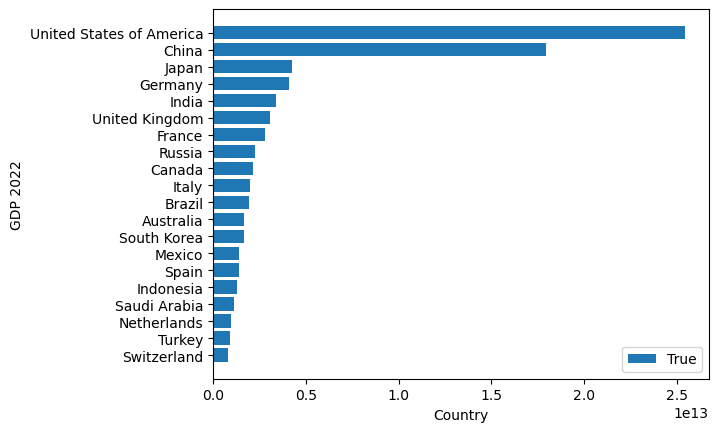

In [68]:
plt.barh(g20_country['country'],g20_country['gdp'],label=True)
plt.xlabel('Country')
plt.ylabel('GDP 2022')
plt.legend()
plt.show()

We will group the scores into some categories. 
1. Democracy score will be grouped into Fulled, Flawed, Hybrid Regime, and Authoriataria. 
2. Peace score will be grouped into very high, high, medium, low and very low. 
3. And, happiness score will be grouped into very happy, happy, unhappy, and very unhappy.

In [71]:
def democracy(row):
    if row['democracy score'] >= 8:
        val = 'Fulled'
    elif row['democracy score'] >=6:
        val = 'Flawed'
    elif row['democracy score'] >= 4:
        val = 'Hybrid Regime'
    else:
        val='Authoriatarian'
    return val
g20_country['democracy_cat']=g20_country.apply(democracy,axis=1)
g20_country

,country,gdp,peace_score,happiness_score,democracy score,democracy_cat
19,Switzerland,8.077060e+11,1.357,7.512,9.14,Fulled
18,Turkey,9.059878e+11,2.785,4.744,4.35,Hybrid Regime
17,Netherlands,9.911146e+11,1.522,7.415,9.00,Fulled
16,Saudi Arabia,1.108149e+12,2.288,6.523,2.08,Authoriatarian
15,Indonesia,1.319100e+12,1.800,5.240,6.71,Flawed
14,Spain,1.397509e+12,1.603,6.476,8.07,Fulled
13,Mexico,1.414187e+12,2.612,6.128,5.25,Hybrid Regime
12,South Korea,1.665246e+12,1.779,5.935,8.03,Fulled
11,Australia,1.675419e+12,1.565,7.162,8.71,Fulled
10,Brazil,1.920096e+12,2.465,6.293,6.78,Flawed


In [72]:
def peaces(row):
    if row['peace_score'] < 1.462:
        val = 'Very High'
    elif row['peace_score'] < 1.908:
        val = 'High'
    elif row['peace_score'] < 2.35:
        val = 'Medium'
    elif row['peace_score'] < 2.911:
        val='Low'
    else:
        val='Very Low'
    return val
g20_country['peace_cat']=g20_country.apply(peaces,axis=1)
g20_country

,country,gdp,peace_score,happiness_score,democracy score,democracy_cat,peace_cat
19,Switzerland,8.077060e+11,1.357,7.512,9.14,Fulled,Very High
18,Turkey,9.059878e+11,2.785,4.744,4.35,Hybrid Regime,Low
17,Netherlands,9.911146e+11,1.522,7.415,9.00,Fulled,High
16,Saudi Arabia,1.108149e+12,2.288,6.523,2.08,Authoriatarian,Medium
15,Indonesia,1.319100e+12,1.800,5.240,6.71,Flawed,High
14,Spain,1.397509e+12,1.603,6.476,8.07,Fulled,High
13,Mexico,1.414187e+12,2.612,6.128,5.25,Hybrid Regime,Low
12,South Korea,1.665246e+12,1.779,5.935,8.03,Fulled,High
11,Australia,1.675419e+12,1.565,7.162,8.71,Fulled,High
10,Brazil,1.920096e+12,2.465,6.293,6.78,Flawed,Low


In [73]:
def happiness(row):
    if row['happiness_score'] >= 7:
        val = 'Very Happy'
    elif row['happiness_score'] >= 6:
        val = 'Happy'
    elif row['happiness_score'] >= 5:
        val = 'Unhappy'
    else:
        val='Very Unhappy'
    return val
g20_country['happiness_cat']=g20_country.apply(happiness,axis=1)
g20_country

,country,gdp,peace_score,happiness_score,democracy score,democracy_cat,peace_cat,happiness_cat
19,Switzerland,8.077060e+11,1.357,7.512,9.14,Fulled,Very High,Very Happy
18,Turkey,9.059878e+11,2.785,4.744,4.35,Hybrid Regime,Low,Very Unhappy
17,Netherlands,9.911146e+11,1.522,7.415,9.00,Fulled,High,Very Happy
16,Saudi Arabia,1.108149e+12,2.288,6.523,2.08,Authoriatarian,Medium,Happy
15,Indonesia,1.319100e+12,1.800,5.240,6.71,Flawed,High,Unhappy
14,Spain,1.397509e+12,1.603,6.476,8.07,Fulled,High,Happy
13,Mexico,1.414187e+12,2.612,6.128,5.25,Hybrid Regime,Low,Happy
12,South Korea,1.665246e+12,1.779,5.935,8.03,Fulled,High,Unhappy
11,Australia,1.675419e+12,1.565,7.162,8.71,Fulled,High,Very Happy
10,Brazil,1.920096e+12,2.465,6.293,6.78,Flawed,Low,Happy


In [98]:
happiness=pd.DataFrame(g20_country.groupby(['happiness_cat'],as_index=False)['country'].count())

category_order=["Very Happy","Happy","Unhappy","Very Unhappy"]

happiness['happiness_cat']=pd.Categorical(happiness['happiness_cat'], categories=category_order, ordered=True)

happiness=happiness.sort_values('happiness_cat')

happiness

,happiness_cat,country
2,Very Happy,5
0,Happy,9
1,Unhappy,4
3,Very Unhappy,2


<BarContainer object of 4 artists>

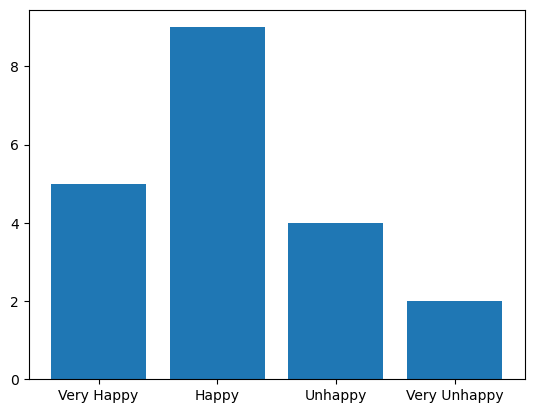

In [99]:
plt.bar(happiness['happiness_cat'],happiness['country'])

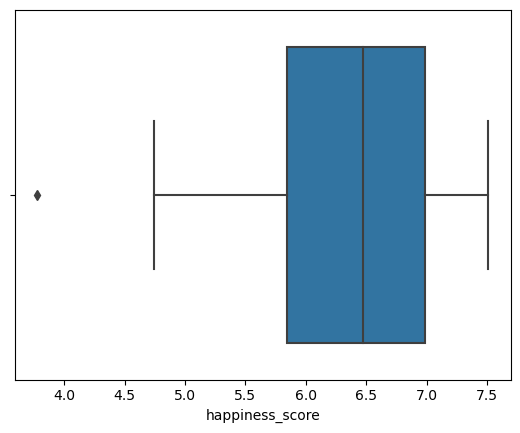

In [126]:
box=sns.boxplot(x=g20_country['happiness_score'])

In [96]:
# Group data based peace category
peace=pd.DataFrame(g20_country.groupby(['peace_cat'],as_index=False)['country'].count())

# Make branchmark to sort the values
category_order = ["Very Low", "Low", "Medium", "High", "Very High"]

# Sort values based on branchmark
peace['peace_cat']=pd.Categorical(peace['peace_cat'], categories=category_order, ordered=True)

peace=peace.sort_values("peace_cat", ascending=False)

peace

,peace_cat,country
3,Very High,3
0,High,9
2,Medium,2
1,Low,5
4,Very Low,1


<BarContainer object of 5 artists>

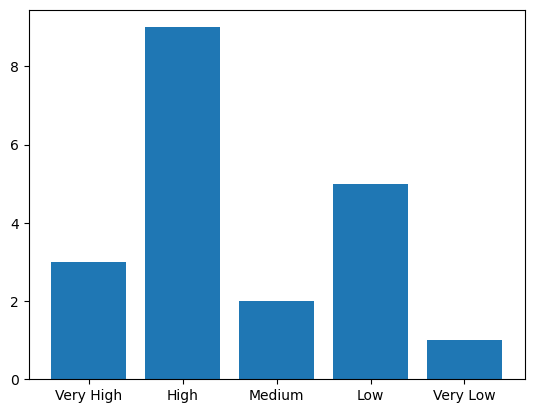

In [97]:
plt.bar(peace['peace_cat'],peace['country'])

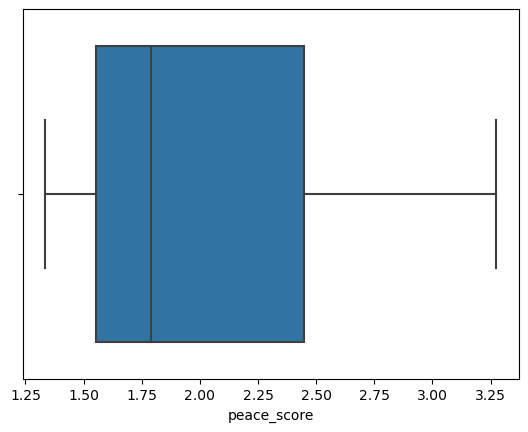

In [130]:
box=sns.boxplot(x=g20_country['peace_score'])

In [83]:
democracy=pd.DataFrame(g20_country.groupby(['democracy_cat'],as_index=False)['country'].count().sort_values(by='country'))
democracy

,democracy_cat,country
3,Hybrid Regime,2
0,Authoriatarian,3
1,Flawed,5
2,Fulled,10


<BarContainer object of 4 artists>

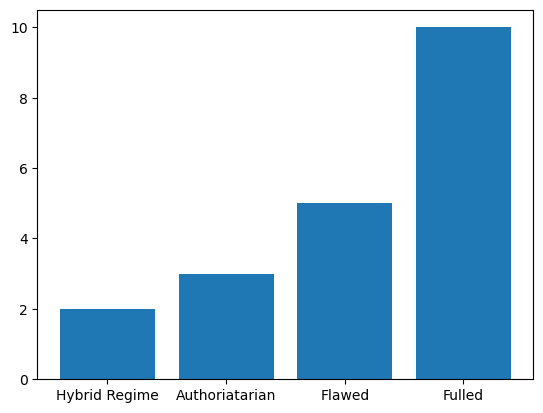

In [87]:
plt.bar(democracy['democracy_cat'],democracy['country'])

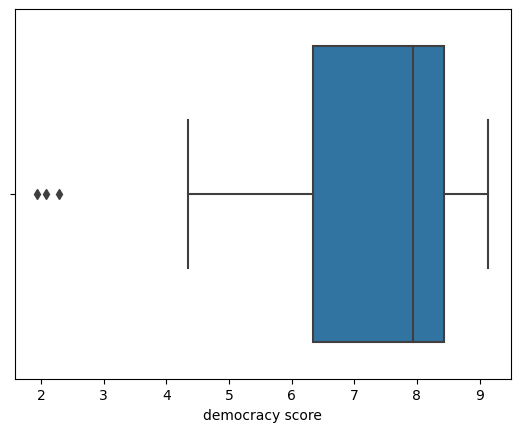

In [131]:
box=sns.boxplot(x=g20_country['democracy score'])

In [134]:
g20_country['happiness_score'].to_list()

[7.512,
 4.744,
 7.415,
 6.523,
 5.24,
 6.476,
 6.128,
 5.935,
 7.162,
 6.293,
 6.467,
 7.025,
 5.459,
 6.687,
 6.943,
 3.777,
 7.034,
 6.039,
 5.585,
 6.977]

In [135]:
g20_country['peace_score'].to_list()

[1.357,
 2.785,
 1.522,
 2.288,
 1.8,
 1.603,
 2.612,
 1.779,
 1.565,
 2.465,
 1.643,
 1.389,
 3.275,
 1.895,
 1.667,
 2.578,
 1.462,
 1.336,
 2.01,
 2.44]

In [136]:
g20_country['democracy score'].to_list()

[9.14,
 4.35,
 9.0,
 2.08,
 6.71,
 8.07,
 5.25,
 8.03,
 8.71,
 6.78,
 7.69,
 8.88,
 2.28,
 8.07,
 8.28,
 7.04,
 8.8,
 8.33,
 1.94,
 7.85]

In [137]:
g20_country.describe()

,gdp,peace_score,happiness_score,democracy score
count,2.000000e+01,20.000000,20.000000,20.000000
mean,4.028154e+12,1.973550,6.271050,6.864000
std,6.248812e+12,0.555356,0.945703,2.386059
min,8.077060e+11,1.336000,3.777000,1.940000
25%,1.377907e+12,1.554250,5.847500,6.345000
50%,1.965264e+12,1.789500,6.471500,7.940000
75%,3.149273e+12,2.446250,6.989000,8.425000
max,2.546270e+13,3.275000,7.512000,9.140000


From the boxplot chart and describe() we can see that:


1. The smallest number in the list is 1.94 and the largest is 9.14, so the range of values is 7.2. The mean of the numbers is approximately 6.8, and the standard deviation is approximately 2.3. This means that most of the numbers are within one standard deviation of the mean, but there are several numbers that are more than one standard deviation away from the mean.
2. The smallest number in the list is 1.336 and the largest is 3.275, so the range of values is 1.939. The mean of the numbers is approximately 1.95, and the standard deviation is approximately 0.5. This means that most of the numbers are within one standard deviation of the mean, which suggests that they are relatively similar to each other. However, there is one number (3.275) that is more than two standard deviations away from the mean.
3. The smallest number in the list is 3.777 and the largest is 7.512, so the range of values is 3.735. The mean of the numbers is approximately 6.3, and the standard deviation is approximately 1.0. This means that most of the numbers are within one standard deviation of the mean, which suggests that they are relatively similar to each other. However, there are a few numbers that are more than one standard deviation away from the mean, which could be considered outliers.

In [ ]:
import plotly.graph_objects as go

fig=go.Figure(go.Bar(x=g20_country['gdp'],y=g20_country['country'], orientation='h'))

fig.show()

In [ ]:
g20_country=g20_country.sort_values(by='happiness_score', ascending=True)

In [ ]:
plt.barh(g20_country['country'],g20_country['happiness_score'])
plt.xlabel('Country')
plt.ylabel('GDP 2022')
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objects as go

fig=go.Figure(go.Bar(x=g20_country['happiness_score'],y=g20_country['country'], orientation='h'))

fig.show()

In [ ]:
import plotly.graph_objects as go

fig=go.Figure(go.Bar(x=g20_country['peace_score'],y=g20_country['country'], orientation='h'))

fig.show()

In [ ]:
#g20_country.to_csv('C:/Users/ADM/Downloads/project/g20.csv',index=False,sep=',')

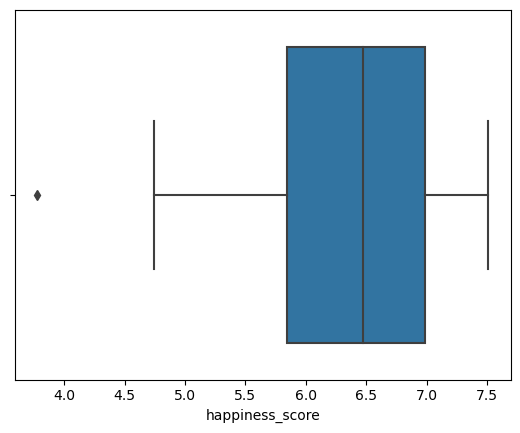

In [101]:
import seaborn as sns

box=sns.boxplot(x=g20_country['happiness_score'])
g=plt.gca()


In [150]:
corr,p=stats.spearmanr(g20_country['gdp'],g20_country['democracy score'])

print('corr =',round(corr,3))
print('p-value =',round(p,3))

corr = -0.038
p-value = 0.875


In [144]:
corr,p=stats.spearmanr(g20_country['gdp'],g20_country['peace_score'])

print('corr =',round(corr,3))
print('p-value =',round(p,3))

corr = 0.023
p-value = 0.925


In [148]:
corr,p=stats.spearmanr(g20_country['gdp'],g20_country['happiness_score'])

print('corr =',round(corr,3))
print('p-value =',round(p,3))

corr = -0.101
p-value = 0.673


1. The correlation betweeen democracy score and GDP in G20 countries is weak. The democracy score is relatively spread and there are 3 authoritarian countries which are member of G20 countries.
2. The correlation between happiness score and GDP in G20 countries is weak. However, The happiness score is relatively similiar to each other and the majority of them is happy. Furthermore, India is G20 country but it's include as very unhappy country
3. The correlation between peace score and GDP in G20 countries is weak. Nevertheles, The peace score is relatively similiar to each other and the majority of them is high peaceful country. 

Based on your conclusions, it might be interesting to explore the reasons behind the weak correlations between democracy, happiness, and peace scores with GDP in G20 countries. For example, you could investigate the factors that contribute to high levels of happiness and peace in countries with lower GDPs, or examine why some countries with high GDPs have lower democracy scores. Additionally, it might be worthwhile to study the outliers in more detail, such as India being a very unhappy country despite being a member of the G20. These could be potential areas for further research or recommendations for policymakers. 

1. In G20 countries, there is a weak correlation between democracy scores and GDP. Democracy scores are relatively spread out, and interestingly, three of the G20 countries are classified as authoritarian.
2. Similarly, the correlation between happiness scores and GDP in G20 countries is also weak. However, happiness scores are relatively similar to each other, with the majority of countries being happy. Notably, India is a member of the G20 but is classified as a very unhappy country.
3. The correlation between peace scores and GDP in G20 countries is also weak. Nevertheless, peace scores are relatively similar to each other, with the majority of countries being highly peaceful.